In [1]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.
# [[YOUR CODE]]
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
# entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
# [[YOUR CODE]]
import os
from os.path import join

data_dir = os.getenv('HOME') + '/aiffel/data_analysis_basic/data'

entry_data_path = join(data_dir, 'entry_data.csv')
sales_data_path = join(data_dir, 'sales_data.csv')
item_data_path = join(data_dir, 'item_data.csv')
item_entry_data_path = join(data_dir, 'item_entry_data.csv')

entry_data = pd.read_csv(entry_data_path)
sales_data = pd.read_csv(sales_data_path)
item_data = pd.read_csv(item_data_path)
item_entry_data = pd.read_csv(item_entry_data_path)

In [3]:
# entry_data 데이터 정보 확인하기
# [[YOUR CODE]]
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [4]:
# item_data 데이터 정보 확인하기
# [[YOUR CODE]]
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [5]:
# item_entry_data 데이터 정보 확인하기
# [[YOUR CODE]]
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [6]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
# [[YOUR CODE]]
#sales_data['결제일시'] = pd.to_datetime(sales_data['결제일시'])
#sales_data['결제금액'] = pd.to_numeric(sales_data['결제금액'])

#temp_var = sales_data['결제금액'].groupby(sales_data['결제일시'].dt.month).sum()

#ax = sns.barplot(data=temp_var.reset_index(), x='결제일시', y='결제금액')
#plt.title('Total sales by month')
#plt.show()

temp_var = sales_data

temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [7]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
# [[YOUR CODE]]
temp_var['date'] = temp_var['결제일시'].apply(lambda x: x[:7])

temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [8]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
# [[YOUR CODE]]
temp_var['결제금액'] = temp_var['결제금액'].apply(lambda x: x.replace(',', ''))
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [9]:
# salse_data의 결제금액을 숫자형태로 바꾸기
# [[YOUR CODE]]
temp_var['payment'] = temp_var['결제금액'].apply(lambda x: int(x))

temp_var['payment'].describe()

count    7105.000000
mean     3903.997185
std      1997.650171
min     -5500.000000
25%      3500.000000
50%      4500.000000
75%      5000.000000
max      9000.000000
Name: payment, dtype: float64

In [10]:
# temp_var의 payment열을 date 기준으로 집계하기
# [[YOUR CODE]]
grouped = temp_var['payment'].groupby(temp_var['date']).sum()
grouped

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

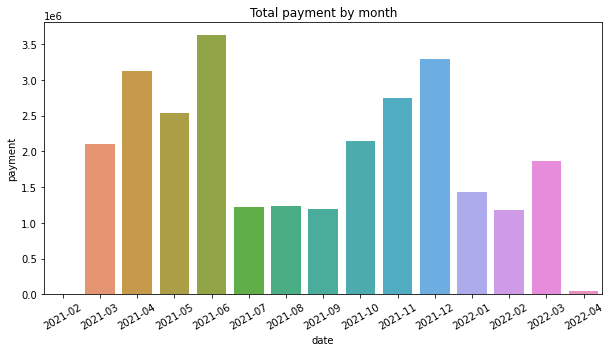

In [11]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped.reset_index(), x='date', y='payment')
plt.title('Total payment by month')
plt.xticks(rotation=30)
plt.show()

In [12]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# [[YOUR CODE]]
item_count = temp_var['상품명'].loc[temp_var['판매수량']==1].value_counts()
item_count

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Name: 상품명, Length: 100, dtype: int64

In [14]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# [[YOUR CODE]]
item_count = pd.DataFrame(item_count)
item_count[:10]

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [15]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# [[YOUR CODE]]
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '~/aiffel/font/malgunbd.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'~/aiffel/font/malgunbd.ttf'

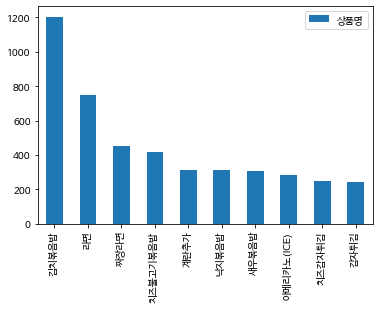

In [16]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
item_count[:10].plot(kind='bar')
plt.show()

In [17]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# [[YOUR CODE]]
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum()
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: payment, Length: 100, dtype: int64

In [18]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         5971900
라면            2916000
치즈불고기볶음밥      2276100
짜장라면          2032500
낙지볶음밥         1699700
새우볶음밥         1529800
치즈감자튀김        1348700
감자튀김          1083800
아메리카노(ICE)     936100
불닭볶음면          688500
Name: payment, dtype: int64

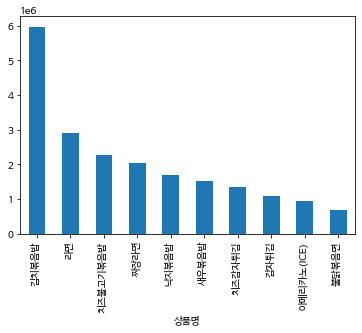

In [19]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
items_payment[:10].plot(kind='bar')
plt.show()

In [20]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var = entry_data.copy()
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [21]:
# temp_var의 금액을 숫자형태로 변환하기
# [[YOUR CODE]]
temp_var['금액'].astype('int')
temp_var['금액']

0        3000
1        3000
2        7400
3        7400
4        7400
         ... 
22550    6500
22551    6500
22552    7000
22553    7000
22554    7000
Name: 금액, Length: 22555, dtype: int64

In [22]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
# [[YOUR CODE]]
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [23]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

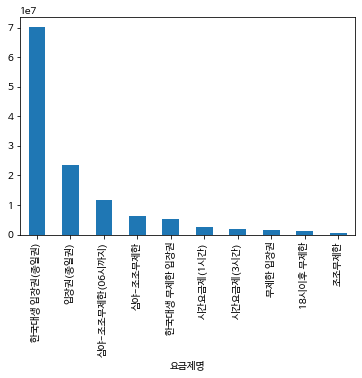

In [24]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
tickets[:10].plot(kind='bar')
plt.show()

In [25]:
# 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.
# [[YOUR CODE]]
tickets_total_payment = temp_var['금액'].sum()
tickets_total_payment

125373400

In [26]:
# [[YOUR CODE]]
sales_data['결제금액'] = sales_data['결제금액'].apply(lambda x: int(x))
items_total_payment = sales_data['결제금액'].sum()
items_total_payment

27737900

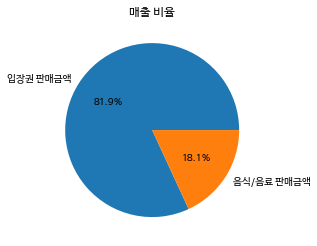

In [27]:
# [[YOUR CODE]]
ratio = [tickets_total_payment, items_total_payment]
labels = ['입장권 판매금액', '음식/음료 판매금액']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('매출 비율')
plt.show()

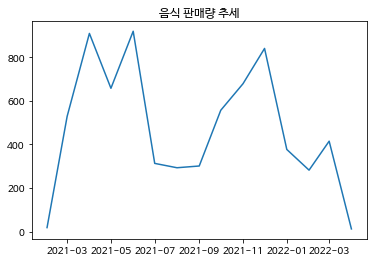

In [28]:
# [[YOUR CODE]]
sales_data['date'] = pd.to_datetime(sales_data['date'])
grouped = sales_data['결제금액'].groupby(sales_data['date']).count()
plt.plot(grouped)
plt.title('음식 판매량 추세')
plt.show()